In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
M = np.loadtxt(open("MatrixCompletion/M.csv", "rb"), delimiter=",")
O = np.loadtxt(open("MatrixCompletion/O.csv", "rb"), delimiter=",")

X = np.multiply(M, O)
print(la.matrix_rank(M, tol=5e-4))

4


In [3]:
def grad(X):
    U, S, V = la.svd(X, full_matrices=0, compute_uv = 1)
    
    Z = np.dot(U, V)
    return Z

In [4]:
def proj(X, M, O):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if int(O[i][j]) == 1:
                X[i][j] = M[i][j]
    return X

In [5]:
def errorF(X, M):
    error = (1/100*la.norm(M - X, 'fro'))**2
    
    return error

In [6]:
def subgradient(X, M, O, eta_type, t):
    if eta_type == 1:
        eta = 1/(t + 1)
    else:
        eta = 1/np.sqrt(t + 1)
    
    X = X - eta*grad(X)
    
    X = proj(X, M, O)
    
    return X

In [7]:
def descent(update, X, M, O, eta_type):
    error = []
    nuc = []
    rankX = []
    
    T = 1000
    
    for t in range(T):
        X = update(X, M, O, eta_type, t)
        
        if (t % 1 == 0) or (t == T - 1):
            error.append(errorF(X, M))
            nuc.append(la.norm(X, 'nuc'))
            rankX.append(la.matrix_rank(X, tol=5e-2))
    
    return X, error, rankX, nuc

In [8]:
X0, error0, rankX0, nuc0 = descent(subgradient, X, M, O, 1)

In [9]:
X1, error1, rankX1, nuc1 = descent(subgradient, X, M, O, 0)

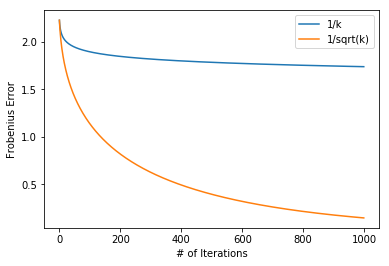

In [11]:
%matplotlib inline

plt.plot(error0, label="1/k")
plt.plot(error1, label="1/sqrt(k)")
plt.ylabel("Frobenius Error")
plt.xlabel("# of Iterations")
plt.legend()

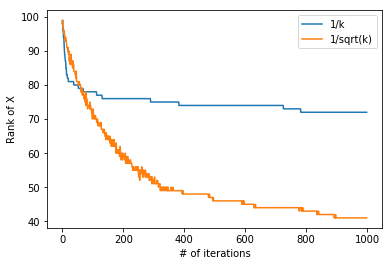

In [12]:
%matplotlib inline

plt.plot(rankX0, label="1/k")
plt.plot(rankX1, label="1/sqrt(k)")
plt.ylabel("Rank of X")
plt.xlabel("# of iterations")
plt.legend()

The rank is decreasing as X approaches the true solution of M. 

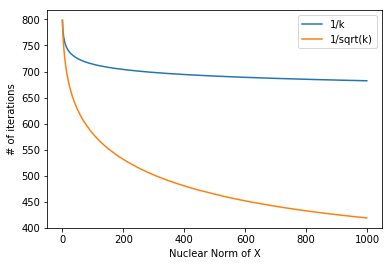

In [13]:
%matplotlib inline

plt.plot(nuc0, label="1/k")
plt.plot(nuc1, label="1/sqrt(k)")
plt.xlabel("Nuclear Norm of X")
plt.ylabel("# of iterations")
plt.legend()